<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
A set of faux-neurons whose output is the input of your model.
### Hidden Layer:
Neurons which are neither input nor output nodes. The part inside the black box (though they can be investigated).
### Output Layer:
Neurons whose values are used as output of the model. Also used for training output.
### Neuron:
Nodes which take input values and return a sum of weights * values.
### Weight:
Values by which neurons multiply their inputs.
### Activation Function:
Functions applied to output of neurons to limit the output domain.
### Node Map:
A diagram of nodes in a neural network.
### Perceptron:
A neural "network" consisting of a single neuron.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [54]:
import pandas as pd
import numpy
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'bias': [1,1,1,1],
         'y':  [1,1,1,0],
       }

df = pd.DataFrame.from_dict(data).astype('int')
X = df[['x1', 'x2', 'bias']]
y = df[['y']]
X.shape

(4, 3)

In [55]:
def sigmoid(n):
    return 1 / (1 + numpy.exp(-n))
def logit(n):
    sig = sigmoid(n)
    return sig * (1 - sig)

In [56]:
weights = numpy.zeros((X.shape[1], 1), dtype=float)

for i in range(10000):
    output = sigmoid(numpy.dot(X, weights))
    error = y - output
    adjustments = error * logit(output)
    weights += numpy.dot(X.T, adjustments)

output

array([[0.99999998],
       [0.99744837],
       [0.99744837],
       [0.00281285]])

In [57]:
weights

array([[-11.83940805],
       [-11.83940805],
       [ 17.80797679]])

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [50]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset.

In [117]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = MinMaxScaler().fit_transform(diabetes[feats])
X = numpy.hstack((X, numpy.ones((diabetes.shape[0],1))))
y = diabetes[['Outcome']]
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        1.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        1.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        1.        ]])

In [342]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, n_iter=10, rate=0.01):
        self.n_iter = n_iter
        self.rate = rate

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        self.weights = numpy.zeros((X.shape[1], 1))

        for i in range(self.n_iter):
            output = sigmoid(numpy.dot(X, self.weights))
            error = self.rate * (y - output)
            adjustments = error * logit(output)
            self.weights += numpy.dot(X.T, adjustments)

    def predict(self, X):
        """Return class label after unit step"""
        return sigmoid(numpy.dot(X, self.weights))

In [348]:
perceptron = Perceptron(n_iter=10001)
perceptron.fit(X, y)

In [349]:
pt = perceptron.predict(X)
pred = (pt + 0.5).astype(int)

In [350]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y)

0.78515625

In [351]:
scores = []
for i in range(300):
    p = Perceptron(n_iter=i)
    p.fit(X, y)
    pred = (p.predict(X) + 0.5).astype(int)
    scores.append(accuracy_score(pred, y))
scores[-10:]

[0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334,
 0.7708333333333334]

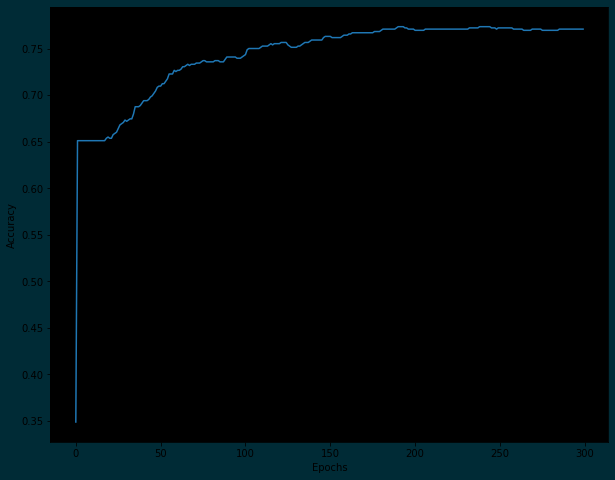

In [354]:
import matplotlib.pyplot as pyplot

pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'
pyplot.rcParams['figure.figsize'] = (10,8)

pyplot.plot(scores)
pyplot.yticks([i/100 for i in range(35,76,5)])
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')

pyplot.show()

In [357]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

perceptron = Perceptron(n_iter=10001)
perceptron.fit(X_train, y_train)
pt = perceptron.predict(X_test)
pred = (pt + 0.5).astype(int)

accuracy_score(pred, y_test)

0.78125

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?